In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/london-bike-sharing-dataset/london_merged.csv


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [34]:
df= pd.read_csv("/kaggle/input/london-bike-sharing-dataset/london_merged.csv",parse_dates=['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [35]:
#데이터의 타입과 구조

print('데이터의 구조는: ', df.shape)
print('데이터의 타입은: ', df.dtypes)
print('데이터의 칼럼은: ', df.columns)

데이터의 구조는:  (17414, 10)
데이터의 타입은:  timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
데이터의 칼럼은:  Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB
None


In [37]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

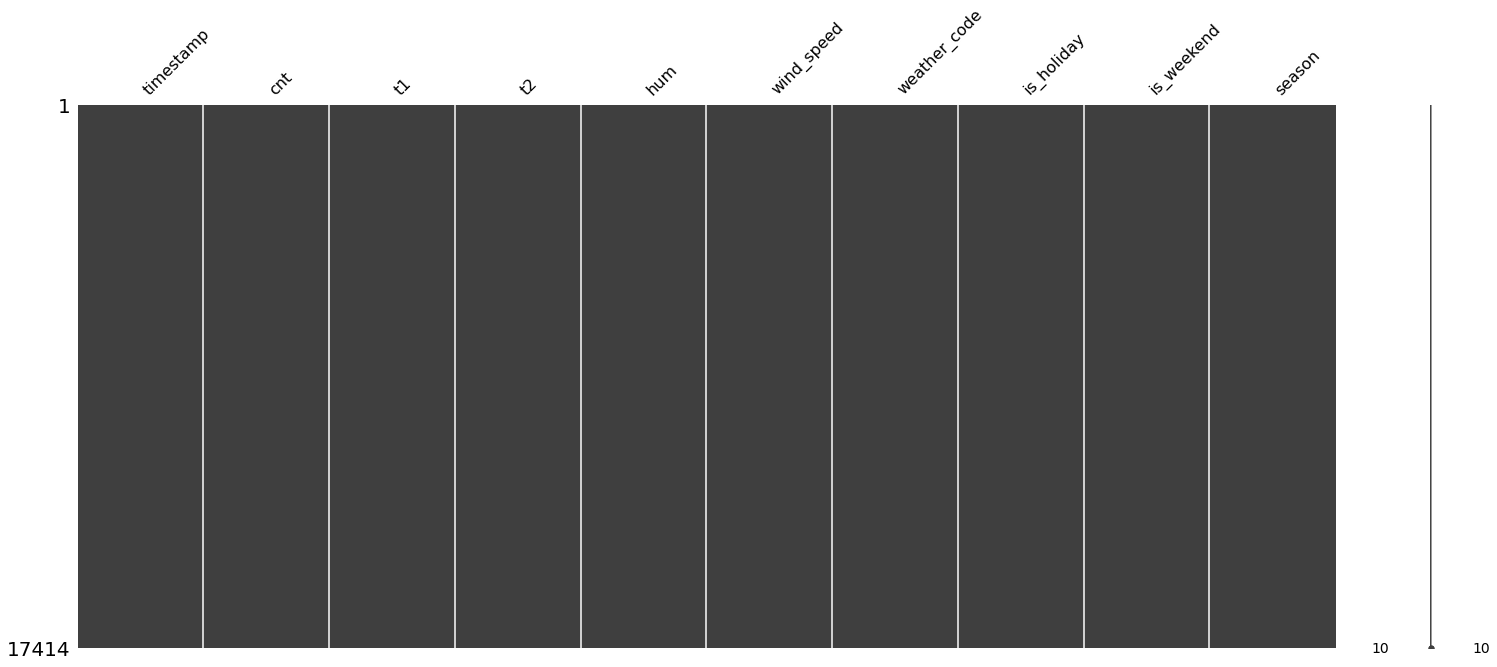

In [38]:
msno.matrix(df)
plt.show() #결측치를 확인할 수 있음.

In [39]:
df['year']=df['timestamp'].dt.year
df['month']=df['timestamp'].dt.month
df['dayofweek']=df['timestamp'].dt.dayofweek
df['hour']=df['timestamp'].dt.hour
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


In [40]:
print(df['year'].value_counts())
print(df['month'].value_counts())
print(df['dayofweek'].value_counts())
print(df['hour'].value_counts())



2016    8699
2015    8643
2017      72
Name: year, dtype: int64
5     1488
1     1487
8     1484
12    1484
7     1481
10    1479
3     1468
4     1438
11    1430
6     1422
9     1394
2     1359
Name: month, dtype: int64
0    2508
1    2505
6    2505
3    2492
2    2489
5    2465
4    2450
Name: dayofweek, dtype: int64
16    730
15    729
12    729
14    728
17    728
13    728
18    728
19    727
11    727
20    727
9     727
7     726
6     726
21    726
22    725
10    725
8     724
1     724
0     724
23    722
5     721
4     721
3     721
2     721
Name: hour, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='cnt'>

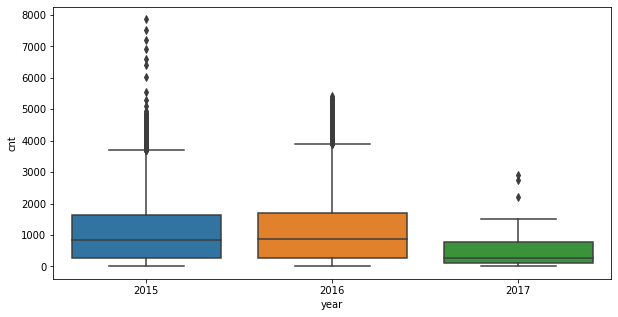

In [41]:
a,b=plt.subplots(1,1,figsize=(10,5))
sns.boxplot(df['year'],df['cnt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='month', ylabel='cnt'>

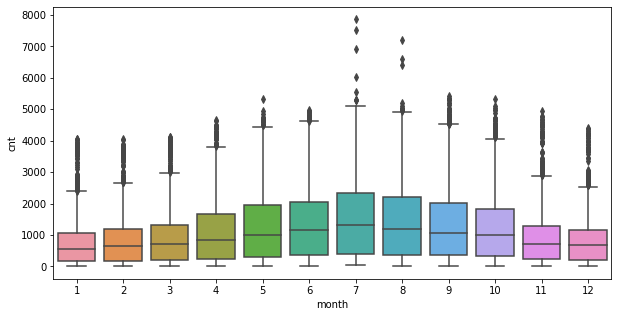

In [42]:
a,b=plt.subplots(1,1,figsize=(10,5))
sns.boxplot(df['month'],df['cnt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='dayofweek', ylabel='cnt'>

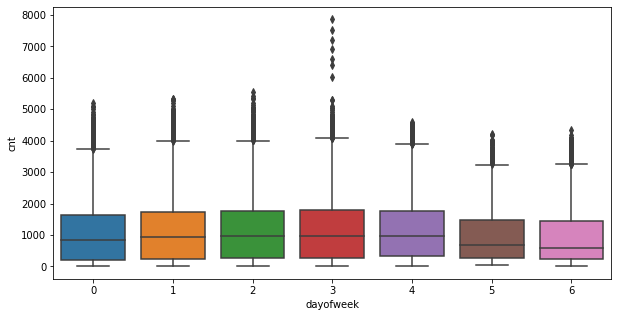

In [43]:
a,b=plt.subplots(1,1,figsize=(10,5))
sns.boxplot(df['dayofweek'],df['cnt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hour', ylabel='cnt'>

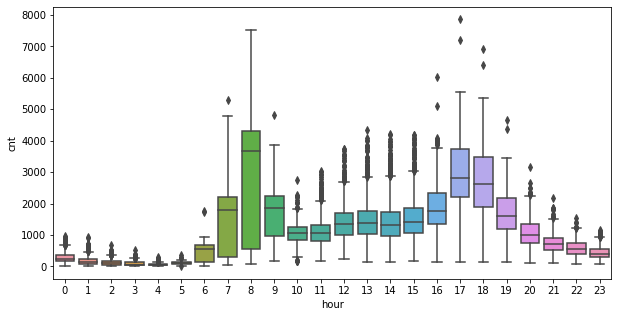

In [44]:
a,b=plt.subplots(1,1,figsize=(10,5))
sns.boxplot(df['hour'],df['cnt'])

In [45]:
# 그래프 함수 만들기
def plot_bar(data,feature):
    fig=plt.figure(figsize=(12,3))
    sns.barplot(x=feature,y='cnt',data=data,palette='Set3',orient='v')
    

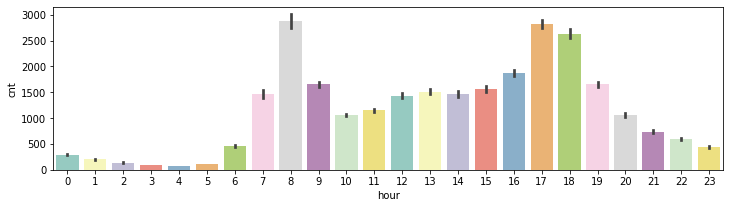

In [46]:
plot_bar(df,'hour')

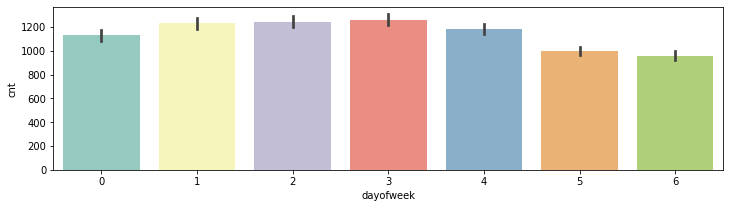

In [47]:
plot_bar(df,'dayofweek')

In [48]:
#아웃라이어 제거 
def is_outliers(s):
    lower_limit= s.mean()-(s.std()*3)
    upper_limit= s.mean()+(s.std()*3)
    return ~s.between(lower_limit, upper_limit)


In [49]:
df_out= df[~df.groupby('hour')['cnt'].apply(is_outliers)]

In [50]:
print('이상치 제거전: ',df.shape)
print('이상치 제거후: ',df_out.shape)

이상치 제거전:  (17414, 14)
이상치 제거후:  (17265, 14)


In [51]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year                     int64
month                    int64
dayofweek                int64
hour                     int64
dtype: object

In [52]:
df_out['weather_code']=df_out['weather_code'].astype('category')
df_out['season']=df_out['season'].astype('category')
df_out['year']=df_out['year'].astype('category')
df_out['month']=df_out['month'].astype('category')
df_out['hour']=df_out['hour'].astype('category')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [53]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday             float64
is_weekend             float64
season                category
year                  category
month                 category
dayofweek                int64
hour                  category
dtype: object

In [54]:
df_out['season']

/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
17409    3.0
17410    3.0
17411    3.0
17412    3.0
17413    3.0
Name: season, Length: 17265, dtype: category
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]

In [55]:
df_out = pd.get_dummies(df_out,columns=['weather_code','season','year','month','hour'])

In [56]:
df_out.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df_out.shape

(17265, 59)

In [58]:
df_y=df_out['cnt']
df_x=df_out.drop(['timestamp','cnt'],axis=1)
df_x

,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,weather_code_2.0,weather_code_3.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3.0,2.0,93.0,6.0,0.0,1.0,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.5,93.0,5.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.5,2.5,96.5,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,100.0,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,0.0,93.0,6.5,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,5.0,1.0,81.0,19.0,0.0,0.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
17410,5.0,1.0,81.0,21.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
17411,5.5,1.5,78.5,24.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17412,5.5,1.5,76.0,23.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [59]:
df_y

0         182
1         138
2         134
3          72
4          47
         ... 
17409    1042
17410     541
17411     337
17412     224
17413     139
Name: cnt, Length: 17265, dtype: int64

In [60]:
#훈련용, 테스트용 데이터 분리

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,random_state=777,test_size=0.3,shuffle=False)

In [61]:
print('x_train의 구조는: ',x_train.shape)
print('x_test의 구조는: ',x_test.shape)
print('y_train의 구조는: ',y_train.shape)
print('y_test의 구조는: ',y_test.shape)


x_train의 구조는:  (12085, 57)
x_test의 구조는:  (5180, 57)
y_train의 구조는:  (12085,)
y_test의 구조는:  (5180,)


In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [63]:
model= Sequential()
model.add(Dense(units=160,activation='relu',input_dim=57))
model.add(Dense(units=60, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               9280      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                9660      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1220      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 20,181
Trainable params: 20,181
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
early_stopping=EarlyStopping(monitor='loss',patience=5, mode='min')
history=model.fit(x_train,y_train,epochs=5,batch_size=1,validation_split=0.1,callbacks=[early_stopping])

Epoch 1/5
10876/10876 [==============================] - 14s 1ms/step - loss: 640.8850 - mae: 640.8850 - val_loss: 473.3040 - val_mae: 473.3040
Epoch 2/5
10876/10876 [==============================] - 12s 1ms/step - loss: 349.0149 - mae: 349.0149 - val_loss: 302.1236 - val_mae: 302.1236
Epoch 3/5
10876/10876 [==============================] - 12s 1ms/step - loss: 263.3972 - mae: 263.3972 - val_loss: 223.6800 - val_mae: 223.6800
Epoch 4/5
10876/10876 [==============================] - 12s 1ms/step - loss: 220.0808 - mae: 220.0808 - val_loss: 211.2148 - val_mae: 211.2148
Epoch 5/5
10876/10876 [==============================] - 12s 1ms/step - loss: 192.0160 - mae: 192.0160 - val_loss: 203.3781 - val_mae: 203.3781


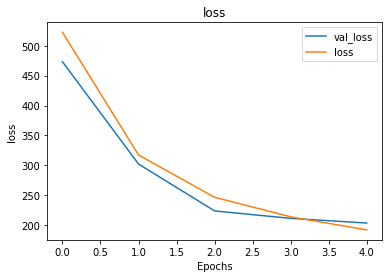

In [66]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['val_loss','loss']) #범례
plt.show()

In [67]:
y_predict=model.predict(x_test)

In [68]:
from sklearn.metrics import mean_squared_error

def RMSE(y_test,y_predict):
    return np.sqrt(mean_squared_error(y_test,y_predict))
print('RMSE', RMSE(y_test,y_predict))

RMSE 375.9196970457382


In [69]:
from sklearn.ensemble import RandomForestRegressor
rf =RandomForestRegressor(n_estimators=100,random_state=16)
rf.fit(x_train,y_train)
rf_result=rf.predict(x_test)
print('RMSE', RMSE(y_test,rf_result))

RMSE 303.6417775662534


In [70]:
from xgboost import XGBRegressor
xgb =XGBRegressor(n_estimators=100, random_state=16)
xgb.fit(x_train,y_train)
xgb_result =xgb.predict(x_test)
print('RMSE',RMSE(y_test, xgb_result))

RMSE 307.09072320247844


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [76]:
from lightgbm import LGBMRegressor
lgb= LGBMRegressor(n_estimators=100,random_state=16)
lgb.fit(x_train,y_train)
lgb_result=lgb.predict(x_test)
print('RMSE',RMSE(y_test,lgb_result))

RMSE 323.2746495922864


In [77]:
xgb = pd.DataFrame(xgb_result)
rf = pd.DataFrame(rf_result)
dnn = pd.DataFrame(y_predict)
lgb = pd.DataFrame(lgb_result)
compare= pd.DataFrame(y_test).reset_index(drop=True)

In [78]:
compare['xgb']=xgb
compare['rf']=rf
compare['dnn']=dnn
compare['lgb']=lgb
compare.head()

,cnt,xgb,rf,dnn,lgb
0,1885,1803.070923,1700.24,1325.675293,1830.345197
1,2175,2228.828125,1803.82,1727.995117,2133.296789
2,2485,2598.814697,2191.37,2047.361694,2590.899050
3,2882,2683.149658,2206.67,2178.891357,2613.783086
4,2965,2590.693848,2276.35,2281.831299,2306.341169


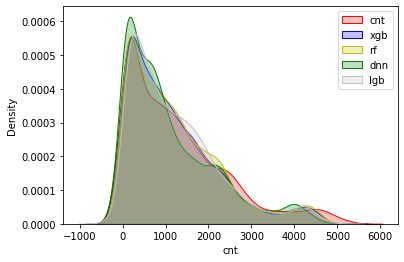

In [87]:
sns.kdeplot(compare['cnt'],shade=True,color='r')
sns.kdeplot(compare['xgb'],shade=True,color='b')
sns.kdeplot(compare['rf'],shade=True,color='y')
sns.kdeplot(compare['dnn'],shade=True,color='g')
sns.kdeplot(compare['lgb'],shade=True,color='silver')
plt.legend(labels=['cnt','xgb','rf','dnn','lgb'])
plt.show()